<a href="https://colab.research.google.com/github/hrishipatil33/Data-Science-Projects/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the csv file for data analysis

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving slary_employee.csv to slary_employee.csv


Importing  Required libraries

In [ ]:
#importing laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Readibg csv file throug pandas

In [ ]:
#loading the data
df=pd.read_csv('slary_employee.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [ ]:
#for shaping our data in file
df.shape

(6704, 9)

In [ ]:
#checking null or not
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [ ]:
#dropping null values
df.dropna(axis=0,inplace=True)

In [ ]:
#checking for null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [ ]:
#droping unnesseray columms
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)


In [ ]:
#to see datatypes
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [ ]:
#to check unique values
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [ ]:
#grouping the job title
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [ ]:
def category_job_title(job_title):
    job_title=str(job_title).lower()
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/ Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/Vp'
    elif 'sales' in job_title or 'representative' in job_title :
        return 'Sales'
    elif 'marketing' in job_title or 'socail media' in job_title :
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title :
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title :
        return 'Hr/Human Resources'
    elif 'finacial' in job_title or 'accountant' in job_title :
        return 'Financial/Accountant'
    elif 'project manager' in job_title :
        return 'Project Manager'
    elif 'it' in job_title or  'support' in job_title :
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title :
        return 'Operations/Supply Chain'
    elif 'customer' in job_title or 'receptionist' in job_title :
        return 'Customer Service /Receptionist'
    else:
      return 'Other'
df['Job Title']=df['Job Title'].apply(category_job_title)

In [ ]:
#result will give the group of job title gruoped
df['Job Title'].unique()

array(['Software/Developer', 'Data Analyst/ Scientist',
       'Manager/Director/Vp', 'Sales', 'Marketing/Social Media',
       'Customer Service /Receptionist', 'Other', 'IT/Technical Support',
       'Product/Designer', 'Financial/Accountant', 'Hr/Human Resources',
       'Operations/Supply Chain'], dtype=object)

In [ ]:
#finding unique Education Level
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [ ]:
def group_education(Educaton):

    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,None,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,None,Data Analyst/ Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/Vp,15.0,150000.0,Canada,White
3,36.0,Female,None,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,None,Manager/Director/Vp,20.0,200000.0,USA,Asian


**Data Analysis**


Pie Chart For gender

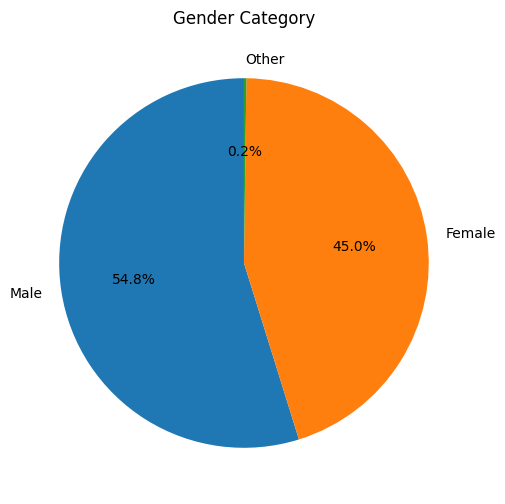

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male', 'Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Category')
plt.show()

The pie Shows that male employyes are more with 54.81 percent and female with 44.98 percent . The othe gender employees are 0.2 percent

**Age Distribution**

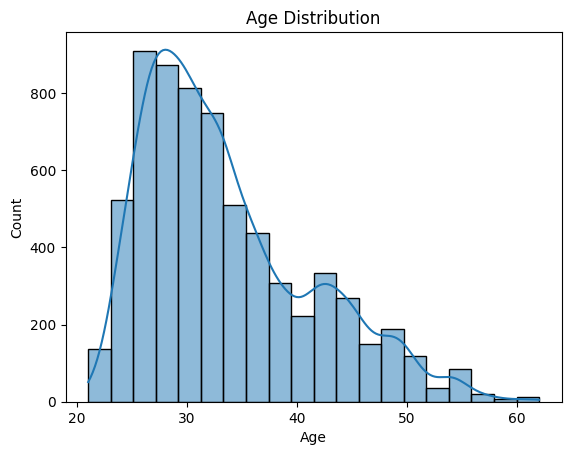

In [ ]:
sns.histplot(data=df , x='Age', bins=20,kde=True)
plt.title('Age Distribution')
plt.show()


There are majority of employees are in between age of 25-35  which means they are active ,talented and energatic .A vey few old employyes ranges from 55-60 age .

(array([0, 1]), [Text(0, 0, 'PhD'), Text(1, 0, 'High School')])

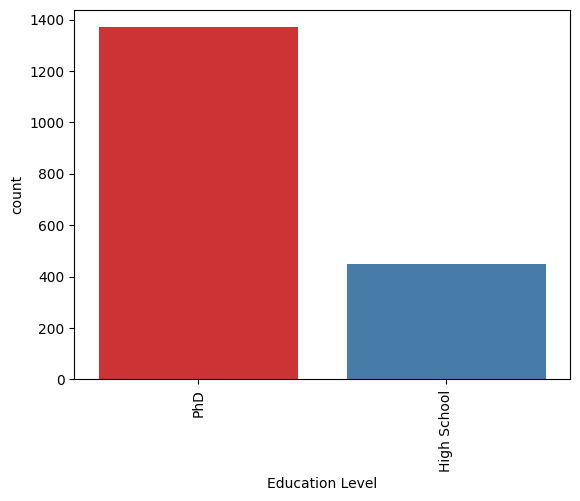

In [ ]:
sns.countplot(x='Education Level' ,data=df,palette='Set1')
plt.xticks(rotation=90)



The most of employess having bachelors degree and masters degree.Few of employes are of High school.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/ Scientist'),
  Text(2, 0, 'Manager/Director/Vp'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service /Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'Hr/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

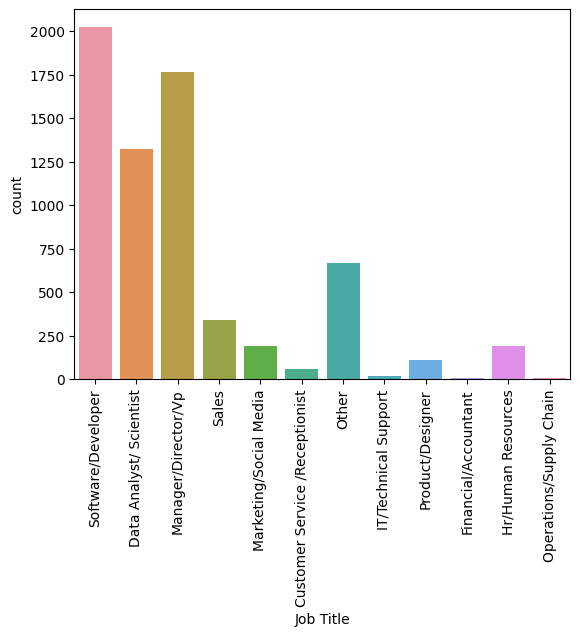

In [ ]:

sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)


This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/Vp. Few amount of employees have job titles such as sales, marketing/social media, HR, Product Designer and Customer Service. Very few of the eomployees work as a Financial/accountant or operation/supply management.

<Axes: xlabel='Years of Experience', ylabel='Count'>

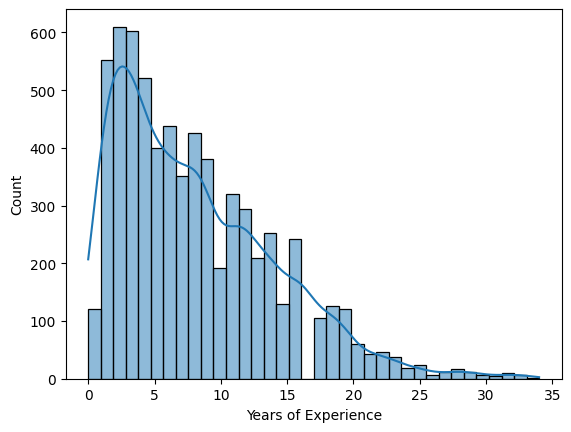

In [ ]:
sns.histplot(x='Years of Experience', data = df, kde=True)
#sns.histplot(x = 'Years of Experience', data = df,kde=True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

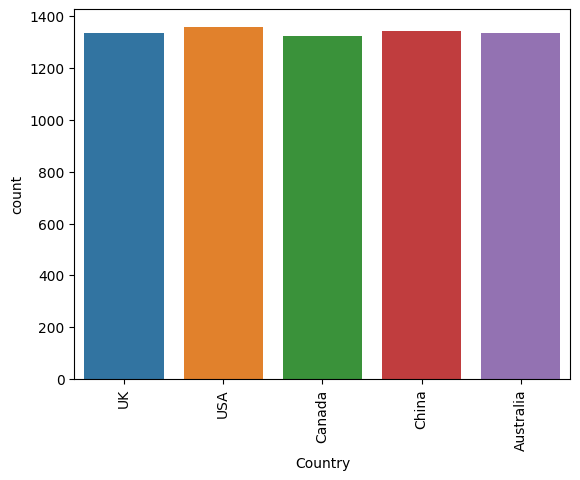

In [ ]:
sns.countplot(x='Country' ,data = df)
plt.xticks(rotation=90)


The number of employees from the above 5 countries is nearly same, with a little more in USA.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

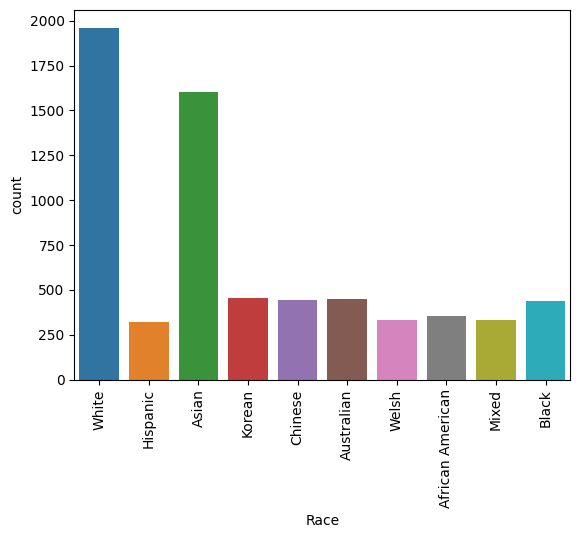

In [ ]:
sns.countplot(x='Race', data=df)
plt.xticks(rotation=90)

This graph help us to know about the racial distribution in the dataset. From the graph, it is clear that most of the employees are either White or Asian, followed by Korean, Chinese, Australian and Black. Number of employees from Welsh, African American, Mixed and Hispanic race are less as compared to other groups

Text(0.5, 1.0, 'Salary vs Age')

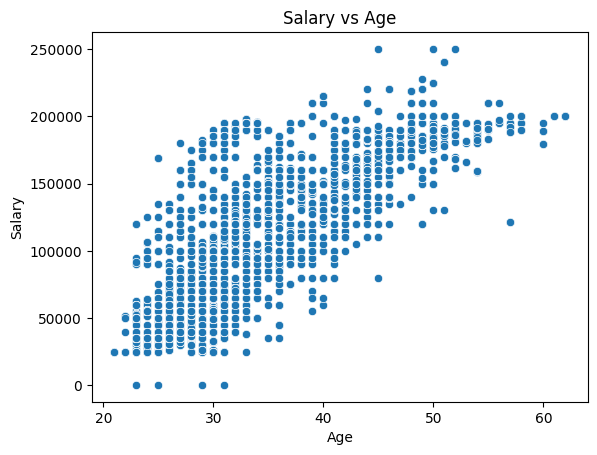

In [ ]:
sns.scatterplot(x='Age',y='Salary', data=df)
plt.title("Salary vs Age")

As we san say that salary of employess increases with the year of experiences increas due to promotions and skills.


Text(0.5, 1.0, 'Gender vs salary')

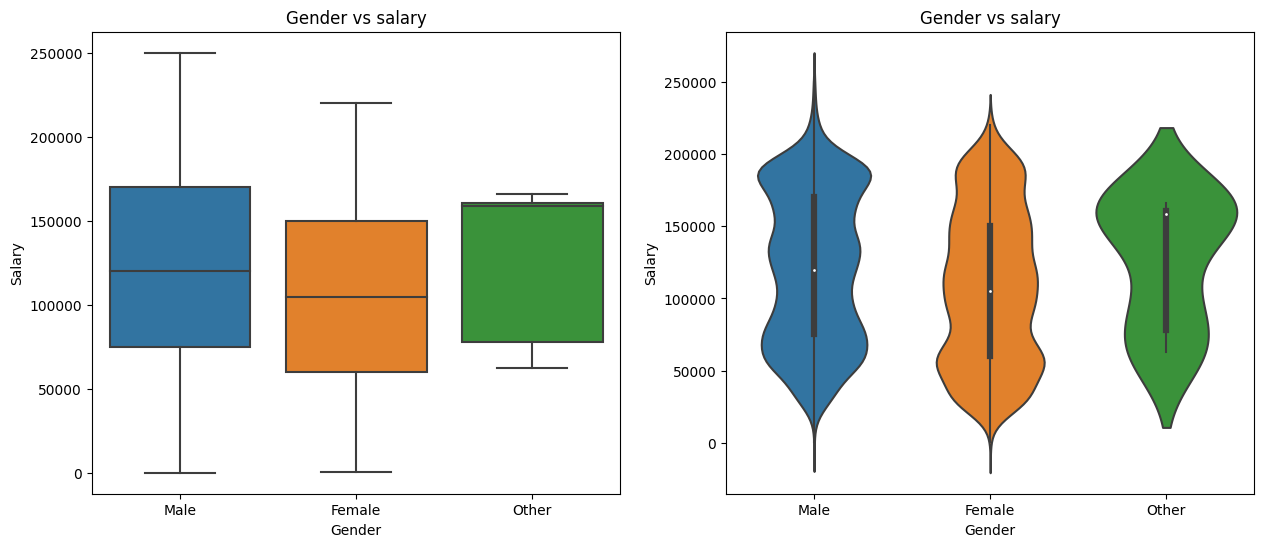

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x='Gender', y='Salary' ,data=df,ax=ax[0]).set_title('Gender vs salary')
sns.violinplot(x='Gender', y='Salary', data=df,ax=ax[1]).set_title('Gender vs salary')


The plots shows us that the other gender employees have hogher salary than male and female .the voilinplot shows male employees having abg 130000 and female have 100000 salary

In [ ]:
df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

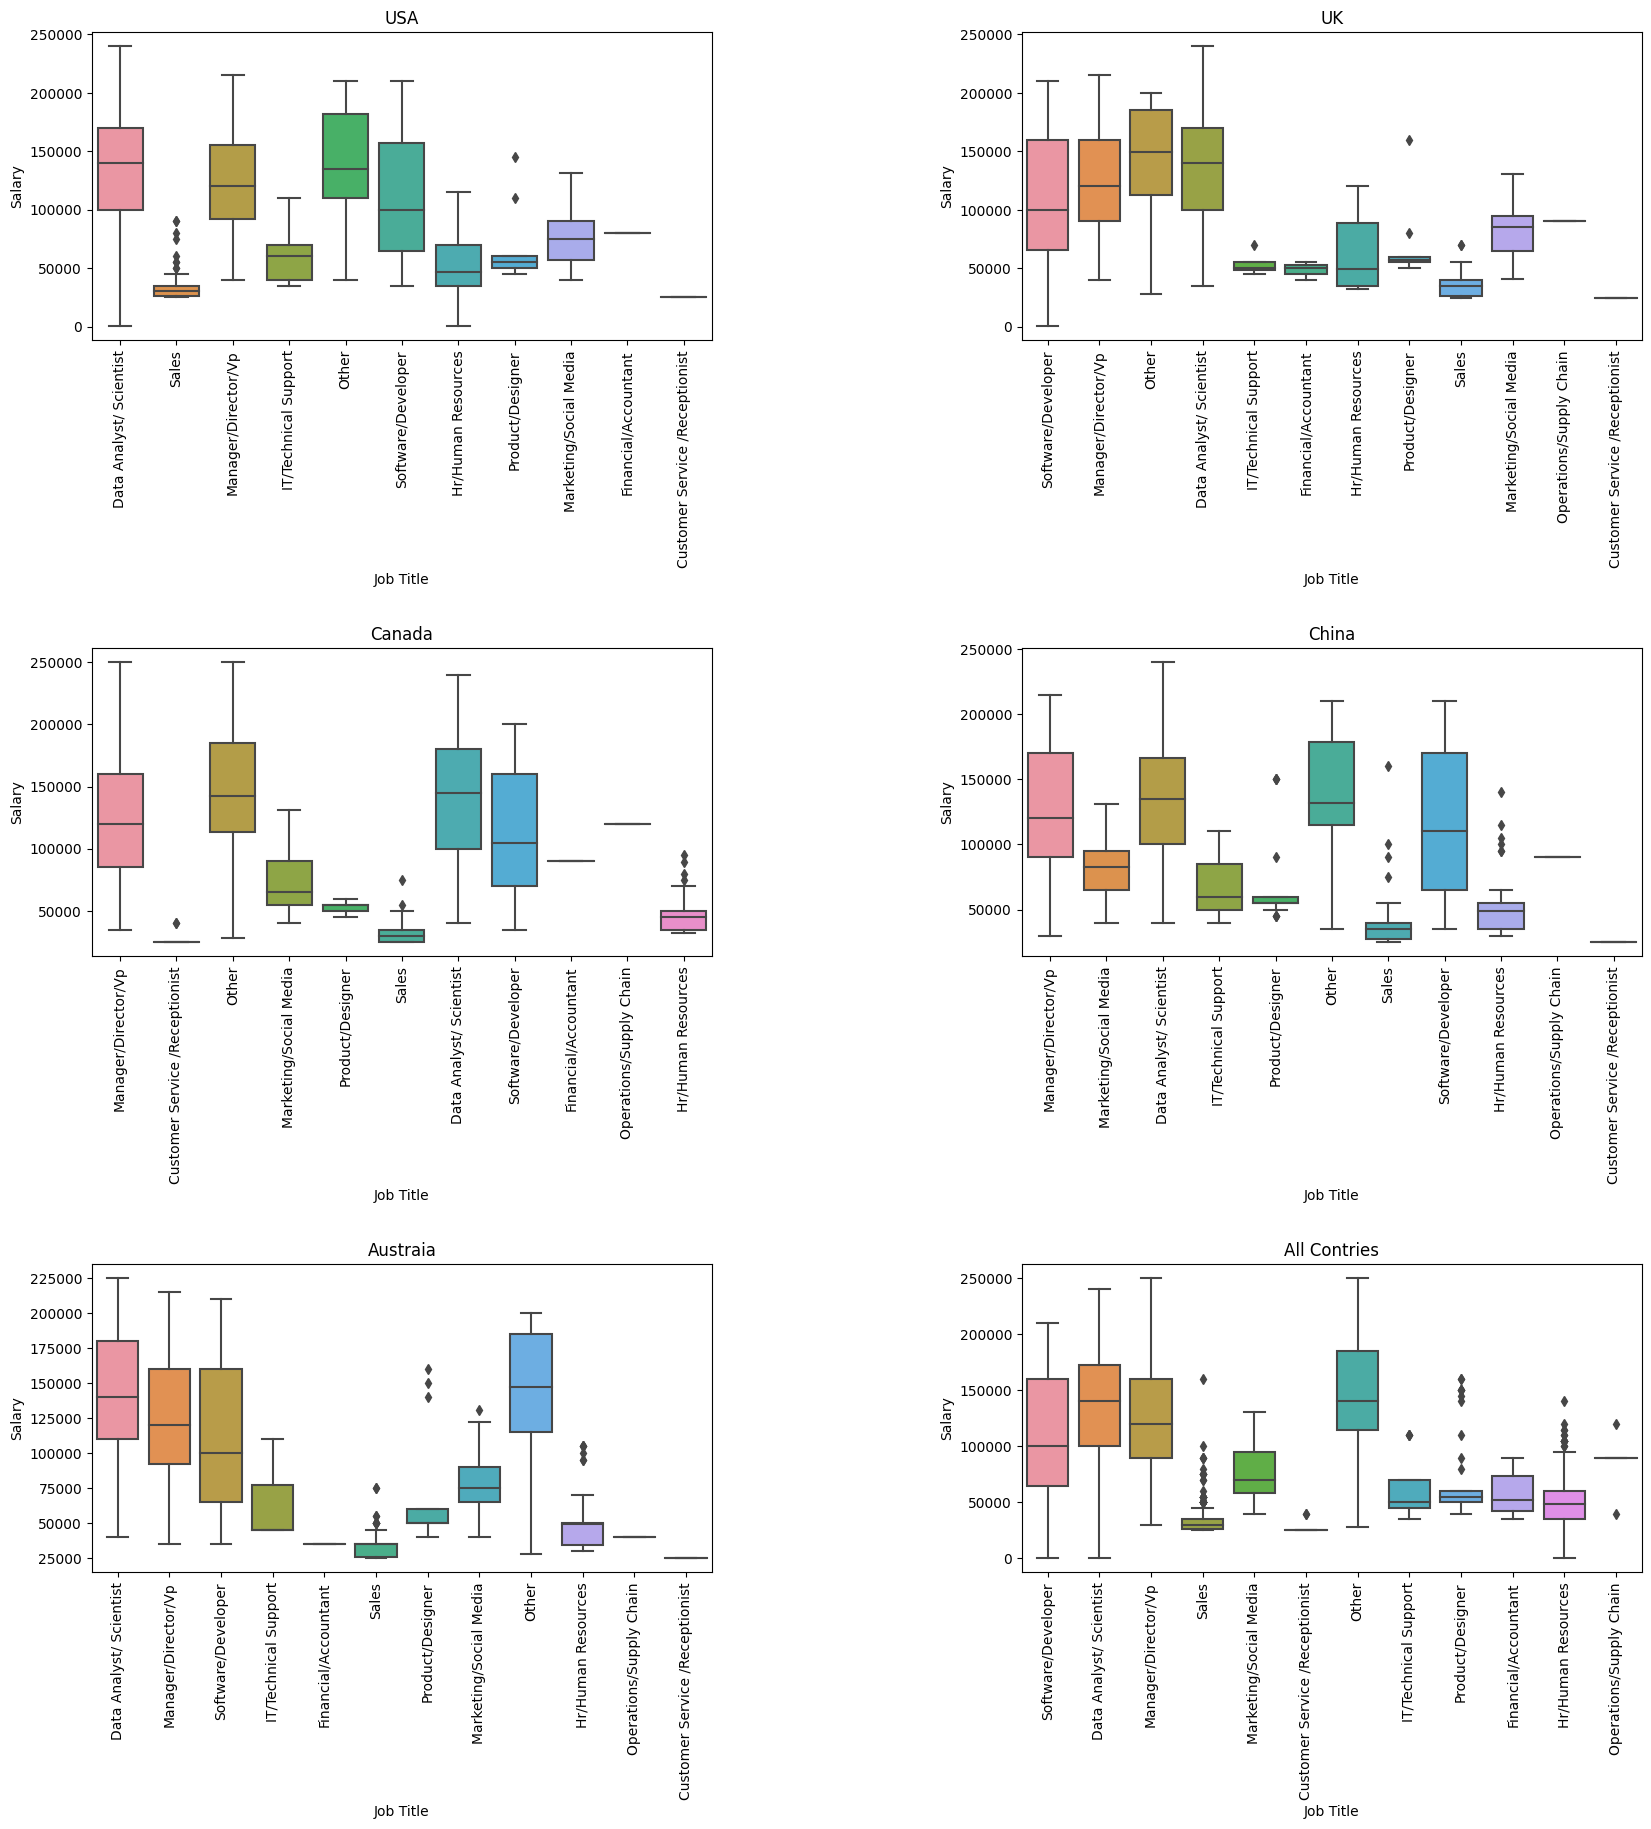

In [ ]:
fig,ax=plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=1,wspace=0.5)
sns.boxplot(x='Job Title',y='Salary',data=df[df['Country']=='USA'],ax=ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x',rotation=90)

sns.boxplot(x='Job Title',y='Salary',data=df[df['Country']=='UK'],ax=ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x',rotation=90)

sns.boxplot(x='Job Title',y='Salary',data=df[df['Country']=='Canada'],ax=ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x',rotation=90)

sns.boxplot(x='Job Title',y='Salary',data=df[df['Country']=='China'],ax=ax[1,1]).set_title('China')
ax[1,1].tick_params(axis='x',rotation=90)

sns.boxplot(x='Job Title',y='Salary',data=df[df['Country']=='Australia'],ax=ax[2,0]).set_title('Austraia')
ax[2,0].tick_params(axis='x',rotation=90)

sns.boxplot(x='Job Title',y='Salary',data=df,ax=ax[2,1]).set_title('All Contries')
ax[2,1].tick_params(axis='x',rotation=90)



After observing all these plots, I conclude that the Job Titles such as Softwarre Developer, Manager/Director/VP and Data Analyst/Scientist have in high demand as well as receive much higer salary than other job titles



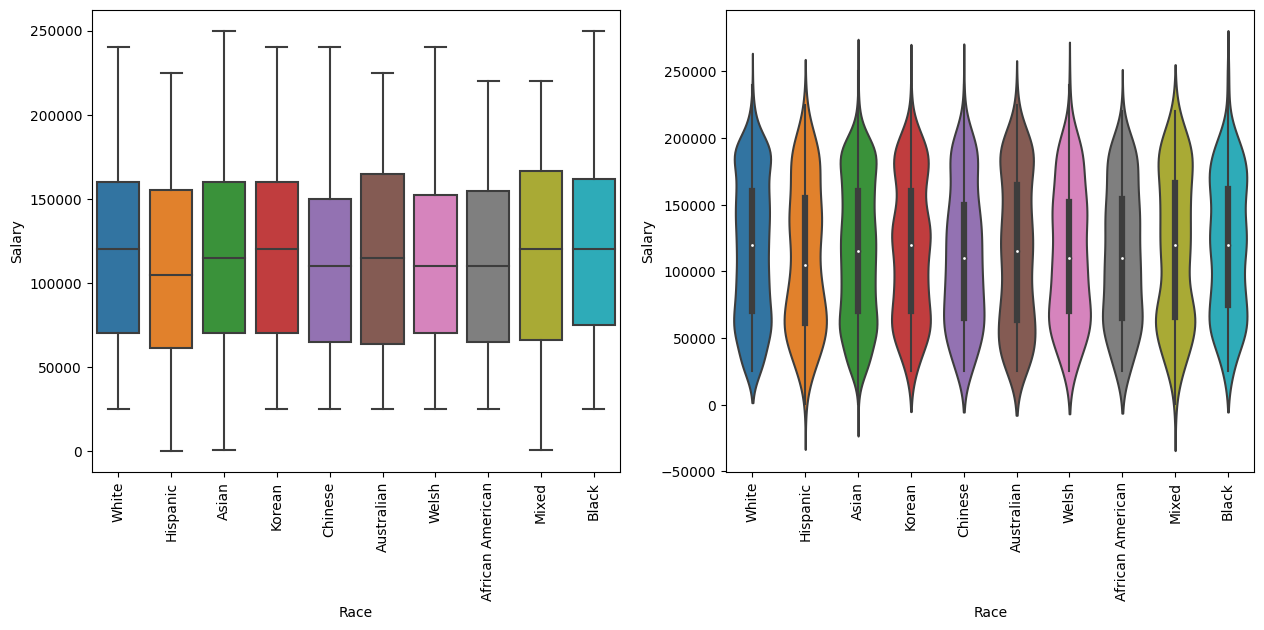

In [ ]:
fi,ax=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x='Race',y='Salary',data=df,ax=ax[0])
ax[0].tick_params(axis='x',rotation=90)

sns.violinplot(x='Race',y='Salary',data=df,ax=ax[1])
ax[1].tick_params(axis='x',rotation=90)

The employees from the races - Australian, Mixed, Blacks and White have the highest median salary, followed by Asian, Korean and Chinese with lowest median salary in employees from hispanic race.
Looking at the violinplot the salary distribution is more concentrated after 150k in white, australian, black and mixed race. Whereas the hispanic has more concentration near 75k.

# **DATA ANALYSIS 2**

Label encodding for categorial features

In [ ]:
 #encode labels of the heads using  labelEncoder
 from sklearn.preprocessing import LabelEncoder
 features = ['Gender','Country','Education Level','Job Title', 'Race']
 le=LabelEncoder()
 for i in features:
      le.fit(df[i].unique())
      df[i]=le.transform(df[i])
      print(i,df[i].unique())


Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [2 1 0]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Age','Years of Experience','Salary']]=scaler.fit_transform(df[['Age','Years of Experience','Salary']])

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,2,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,1,5,1.139440,0.656819,1,9
3,0.312135,0,2,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


<Axes: >

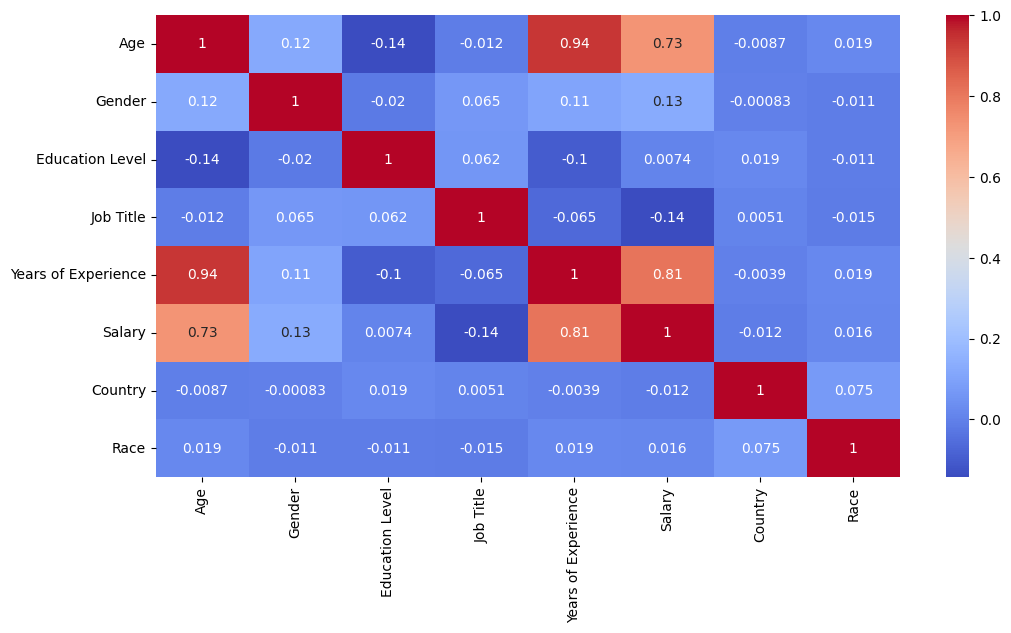

In [ ]:
#coreelation matrix heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In this coorelation matrix, there are three major coorealtions.
1. Salary and Age
2. Salary and Years of Experience
3. Years of Experience and Age

The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

##Train Test Split


In [ ]:
# prompt: train and test split
#from sklearn.model_selection import train_split_test
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test=train_test_split(df.drop('Salary',axis=1),df['Salary'],test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)


Salary Prediction
I will be using the following models:

Decision Tree Regressor

Random Forest Regressor

#Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()


#Hypertuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

grid_search.fit(X_train,y_train)
print(grid_search.best_params_)


{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Building the model on best parameters

In [ ]:

dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [ ]:
#fitting the training data
dtree.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [ ]:
#training accuracy
dtree.score(X_train, y_train)

0.9575287653421508

In [ ]:
#predicting the salary of an employee
d_pred = dtree.predict(X_test)

Evaluating the Decision Tree Regressor Model

In [ ]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.656819,0.575099
1,-0.745659,-0.033230
2,-0.290405,-0.290405
3,-1.048183,-1.041418
4,-0.669294,-0.677905
5,1.414598,1.509320
6,-0.820850,-0.697079
7,-1.142906,-1.122777
8,1.509320,1.554189
9,0.277930,0.300889


<ipython-input-57-0657a5215780>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
<ipython-input-57-0657a5215780>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft['Pre

<Axes: xlabel='Predicted', ylabel='Density'>

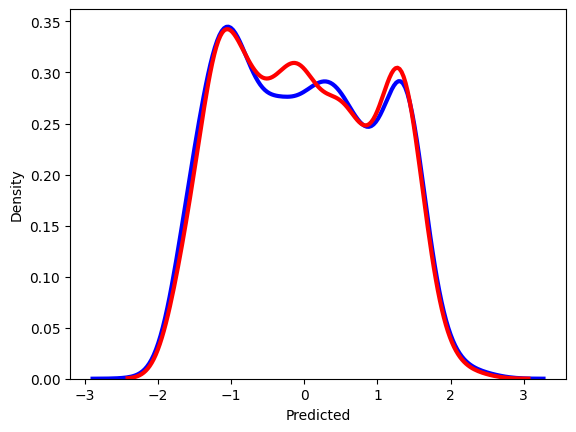

In [ ]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predict')

The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.9232708394263184
Mean Squared Error:  0.07852221656015909
Mean Absolute Error:  0.15253770949747206
RMSE: 0.280218158869405


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [ ]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#training accuracy
rfg.score(X_train, y_train)

0.9839354377561477

In [ ]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

Evaluating Random Forest Regressor Model

In [ ]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.642312
1,-0.745659,0.074021
2,-0.290405,-0.290405
3,-1.048183,-1.050078
4,-0.669294,-0.695343
5,1.414598,1.488797
6,-0.820850,-0.808536
7,-1.142906,-1.112414
8,1.509320,1.534913
9,0.277930,0.308484


<ipython-input-64-48e27b36861c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
<ipython-input-64-48e27b36861c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(  dft['P

<Axes: xlabel='Predicted', ylabel='Density'>

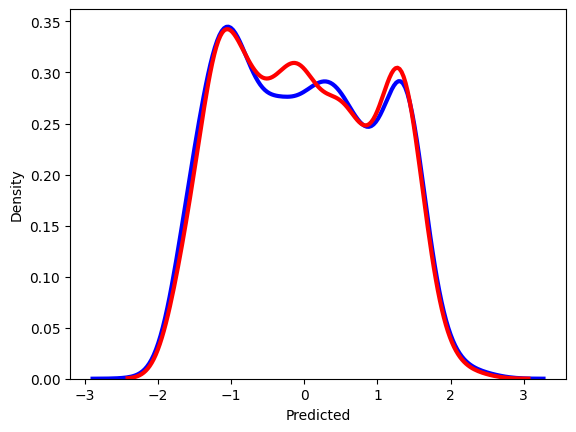

In [ ]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [ ]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9346448986060397
Mean Squared Error:  0.06688236110754403
Mean Absolute Error:  0.13204179415985995
RMSE: 0.25861624293060953


From the exploratory data analysis, I have concluded that the salary of the employees is dependent upon the following factors:

1. Years of Experience
2. Job Title
3. Education Level

Employees with greater years of experience, having job title such as Data analyst/scientist, Software Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, I have used regressor models
- Decision Tree Regressor and Random Forest Regressor for predicting the salary.
The Random Forest Regressor has performed well with the accuracy of 94.6%